In [2]:
%load_ext autoreload
%autoreload 2

In [33]:
from everything import do_everything_before, do_everything_between, do_everything_after, get_train_command
import numpy as np
import os
import torch
from srcnn import SRCNN
import matplotlib.pyplot as plt
from PIL import Image
from interpolate import linear_interpolate
from scipy import fft
import tifffile

In [4]:
SR_TRAINING_IMAGES_DIR = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/SR_training"
HR_FOLDER_NAME = "pmc_0.0655"
LR_FOLDER_NAME = "pmc_0.0655"
METHOD = "cubic"

In [15]:
output = do_everything_before(SR_TRAINING_IMAGES_DIR, HR_FOLDER_NAME, LR_FOLDER_NAME, METHOD)
HR_TRAIN_DIR, HR_TEST_DIR, UPSAMPLED_TRAIN_DIR3, UPSAMPLED_TEST_DIR3, SAVE_OUTPUT_DIR3 = output

In [5]:
SR_TRAINING_IMAGES_DIR = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/SR_training"
HR_FOLDER_NAME = "pmc_0.0655"
LR_FOLDER_NAME = "pmc_0.1638"
METHOD = "cubic"

In [11]:
output = do_everything_before(SR_TRAINING_IMAGES_DIR, HR_FOLDER_NAME, LR_FOLDER_NAME, METHOD)
HR_TRAIN_DIR, HR_TEST_DIR, UPSAMPLED_TRAIN_DIR, UPSAMPLED_TEST_DIR, SAVE_OUTPUT_DIR = output

folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/SR_training/train/pmc_0.1638_cubic/
folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/SR_training/test/pmc_0.1638_cubic/


In [6]:
SR_TRAINING_IMAGES_DIR = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/SR_training"
HR_FOLDER_NAME = "pmc_0.0655"
LR_FOLDER_NAME2 = "pmc_0.1092"
METHOD = "cubic"

In [13]:
output2 = do_everything_before(SR_TRAINING_IMAGES_DIR, HR_FOLDER_NAME, LR_FOLDER_NAME2, METHOD)
HR_TRAIN_DIR, HR_TEST_DIR, UPSAMPLED_TRAIN_DIR2, UPSAMPLED_TEST_DIR2, SAVE_OUTPUT_DIR2 = output2

In [17]:
command1 = get_train_command(300,HR_TRAIN_DIR=UPSAMPLED_TRAIN_DIR3,
                            HR_TEST_DIR=UPSAMPLED_TEST_DIR3,
                            UPSAMPLED_TRAIN_DIR=UPSAMPLED_TRAIN_DIR,
                            UPSAMPLED_TEST_DIR=UPSAMPLED_TEST_DIR,
                            SAVE_OUTPUT_DIR=SAVE_OUTPUT_DIR)
command1

'python train.py --epochs 300 --hr-path "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/SR_training/train/pmc_0.0655_cubic/" --lr-path "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/SR_training/train/pmc_0.1638_cubic/" --hr-validation-path "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/SR_training/test/pmc_0.0655_cubic/" --lr-validation-path "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/SR_training/test/pmc_0.1638_cubic/" --save-path "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/SR_training/train/pmc_0.1638_cubic_output/"'

In [18]:
command2 = get_train_command(300,HR_TRAIN_DIR=UPSAMPLED_TRAIN_DIR3,
                            HR_TEST_DIR=UPSAMPLED_TEST_DIR3,
                            UPSAMPLED_TRAIN_DIR=UPSAMPLED_TRAIN_DIR2,
                            UPSAMPLED_TEST_DIR=UPSAMPLED_TEST_DIR2,
                            SAVE_OUTPUT_DIR=SAVE_OUTPUT_DIR2)
command2

'python train.py --epochs 300 --hr-path "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/SR_training/train/pmc_0.0655_cubic/" --lr-path "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/SR_training/train/pmc_0.1092_cubic/" --hr-validation-path "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/SR_training/test/pmc_0.0655_cubic/" --lr-validation-path "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/SR_training/test/pmc_0.1092_cubic/" --save-path "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/SR_training/train/pmc_0.1092_cubic_output/"'

In [24]:
SEGMENTATION_IMAGES_DIR =  "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training"
HR_FOLDER_NAME = "pmc_0.0655"
LR_FOLDER_NAME_60 = "pmc_0.1092"
LR_FOLDER_NAME_40 = "pmc_0.1638"
SR_MODEL_60_PATH = SAVE_OUTPUT_DIR2 + "model_ckpt.pth"
SR_MODEL_40_PATH = SAVE_OUTPUT_DIR + "model_ckpt.pth"

In [25]:
SR_MODEL_60 = SRCNN()
SR_MODEL_60.load_state_dict(torch.load(SR_MODEL_60_PATH)['model_state_dict'])
SR_MODEL_60.eval()

SRCNN(
  (conv1): Conv2d(1, 64, kernel_size=(9, 9), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(32, 1, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
)

In [26]:
SR_MODEL_40 = SRCNN()
SR_MODEL_40.load_state_dict(torch.load(SR_MODEL_40_PATH)['model_state_dict'])
SR_MODEL_40.eval()

SRCNN(
  (conv1): Conv2d(1, 64, kernel_size=(9, 9), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(32, 1, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
)

In [29]:
between_40 = do_everything_between(SEGMENTATION_IMAGES_DIR,HR_FOLDER_NAME,LR_FOLDER_NAME_40,SR_MODEL_40,METHOD='cubic')
SR_TILED_TRAIN_DIR_40, SR_TILED_TEST_DIR_40, SR_TILED_TEST_SEG_DIR_40 = between_40

folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1638_cubic_SR/
folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1638_cubic_SR_tiled/
folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1638_cubic_SR_tiled/
folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1638_cubic_SR_tiled/


In [30]:
between_60 = do_everything_between(SEGMENTATION_IMAGES_DIR,HR_FOLDER_NAME,LR_FOLDER_NAME_60,SR_MODEL_60,METHOD='cubic')
SR_TILED_TRAIN_DIR_60, SR_TILED_TEST_DIR_60, SR_TILED_TEST_SEG_DIR_60 = between_60

folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1092_cubic_SR_tiled/
folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1092_cubic_SR_tiled/


In [34]:
SR_TILED_TRAIN_DIR_40

'C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1638_cubic_SR_tiled/'

In [35]:
SR_TILED_TRAIN_DIR_60

'C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1092_cubic_SR_tiled/'

In [9]:
!python -m omnipose --train --use_gpu --dir "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1638_cubic_SR_tiled/" --mask_filter "_masks" --n_epochs 200 --pretrained_model None --save_every 10 --save_each --learning_rate 0.1 --diameter 0 --batch_size 16

!NEW LOGGING SETUP! To see cellpose progress, set --verbose
No --verbose => no progress or info printed
2023-02-28 21:30:11,831 [INFO] ** TORCH GPU version installed and working. **
2023-02-28 21:30:11,831 [INFO] >>>> using GPU
Omnipose enabled. See Omnipose repo for licencing details.
2023-02-28 21:30:11,831 [INFO] Training omni model. Setting nclasses=4, RAdam=True
2023-02-28 21:30:12,629 [INFO] not all flows are present, will run flow generation for all images
2023-02-28 21:30:12,881 [INFO] training from scratch
2023-02-28 21:30:12,881 [INFO] median diameter set to 0 => no rescaling during training
2023-02-28 21:30:18,281 [INFO] No precomuting flows with Omnipose. Computed during training.
2023-02-28 21:30:19,013 [INFO] >>> Using RAdam optimizer
2023-02-28 21:30:19,013 [INFO] >>>> training network with 2 channel input <<<<
2023-02-28 21:30:19,013 [INFO] >>>> LR: 0.10000, batch_size: 16, weight_decay: 0.00001
2023-02-28 21:30:19,013 [INFO] >>>> ntrain = 200
2023-02-28 21:30:19,013 [I

In [10]:
!python -m omnipose --train --use_gpu --dir "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1092_cubic_SR_tiled/" --mask_filter "_masks" --n_epochs 200 --pretrained_model None --save_every 10 --save_each --learning_rate 0.1 --diameter 0 --batch_size 16

!NEW LOGGING SETUP! To see cellpose progress, set --verbose
No --verbose => no progress or info printed
2023-03-01 02:01:02,099 [INFO] ** TORCH GPU version installed and working. **
2023-03-01 02:01:02,100 [INFO] >>>> using GPU
Omnipose enabled. See Omnipose repo for licencing details.
2023-03-01 02:01:02,100 [INFO] Training omni model. Setting nclasses=4, RAdam=True
2023-03-01 02:01:02,887 [INFO] not all flows are present, will run flow generation for all images
2023-03-01 02:01:03,166 [INFO] training from scratch
2023-03-01 02:01:03,166 [INFO] median diameter set to 0 => no rescaling during training
2023-03-01 02:01:08,144 [INFO] No precomuting flows with Omnipose. Computed during training.
2023-03-01 02:01:08,721 [INFO] >>> Using RAdam optimizer
2023-03-01 02:01:08,721 [INFO] >>>> training network with 2 channel input <<<<
2023-03-01 02:01:08,721 [INFO] >>>> LR: 0.10000, batch_size: 16, weight_decay: 0.00001
2023-03-01 02:01:08,721 [INFO] >>>> ntrain = 200
2023-03-01 02:01:08,721 [I

In [12]:
!python -m omnipose --train --use_gpu --dir "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1638_cubic_tiled" --mask_filter "_masks" --n_epochs 200 --pretrained_model None --save_every 10 --save_each --learning_rate 0.1 --diameter 0 --batch_size 16

!NEW LOGGING SETUP! To see cellpose progress, set --verbose
No --verbose => no progress or info printed
2023-03-04 21:39:47,203 [INFO] ** TORCH GPU version installed and working. **
2023-03-04 21:39:47,203 [INFO] >>>> using GPU
Omnipose enabled. See Omnipose repo for licencing details.
2023-03-04 21:39:47,204 [INFO] Training omni model. Setting nclasses=4, RAdam=True
2023-03-04 21:39:48,251 [INFO] not all flows are present, will run flow generation for all images
2023-03-04 21:39:48,598 [INFO] training from scratch
2023-03-04 21:39:48,598 [INFO] median diameter set to 0 => no rescaling during training
2023-03-04 21:39:54,526 [INFO] No precomuting flows with Omnipose. Computed during training.
2023-03-04 21:39:55,265 [INFO] >>> Using RAdam optimizer
2023-03-04 21:39:55,265 [INFO] >>>> training network with 2 channel input <<<<
2023-03-04 21:39:55,265 [INFO] >>>> LR: 0.10000, batch_size: 16, weight_decay: 0.00001
2023-03-04 21:39:55,265 [INFO] >>>> ntrain = 200
2023-03-04 21:39:55,266 [I

In [13]:
!python -m omnipose --train --use_gpu --dir "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1092_cubic_tiled" --mask_filter "_masks" --n_epochs 200 --pretrained_model None --save_every 10 --save_each --learning_rate 0.1 --diameter 0 --batch_size 16

!NEW LOGGING SETUP! To see cellpose progress, set --verbose
No --verbose => no progress or info printed
2023-03-05 02:13:00,341 [INFO] ** TORCH GPU version installed and working. **
2023-03-05 02:13:00,341 [INFO] >>>> using GPU
Omnipose enabled. See Omnipose repo for licencing details.
2023-03-05 02:13:00,341 [INFO] Training omni model. Setting nclasses=4, RAdam=True
2023-03-05 02:13:01,301 [INFO] not all flows are present, will run flow generation for all images
2023-03-05 02:13:01,631 [INFO] training from scratch
2023-03-05 02:13:01,632 [INFO] median diameter set to 0 => no rescaling during training
2023-03-05 02:13:07,149 [INFO] No precomuting flows with Omnipose. Computed during training.
2023-03-05 02:13:08,158 [INFO] >>> Using RAdam optimizer
2023-03-05 02:13:08,159 [INFO] >>>> training network with 2 channel input <<<<
2023-03-05 02:13:08,159 [INFO] >>>> LR: 0.10000, batch_size: 16, weight_decay: 0.00001
2023-03-05 02:13:08,159 [INFO] >>>> ntrain = 200
2023-03-05 02:13:08,159 [I

In [3]:
!python -m omnipose --train --use_gpu --dir "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.0655_tiled" --mask_filter "_masks" --n_epochs 3 --pretrained_model "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.0655_tiled/models/cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.0655_tiled_4.pth" --save_every 1 --save_each --learning_rate 0.1 --diameter 0 --batch_size 16

!NEW LOGGING SETUP! To see cellpose progress, set --verbose
No --verbose => no progress or info printed
2023-03-05 23:44:41,229 [INFO] ** TORCH GPU version installed and working. **
2023-03-05 23:44:41,229 [INFO] >>>> using GPU
Omnipose enabled. See Omnipose repo for licencing details.
2023-03-05 23:44:41,229 [INFO] Training omni model. Setting nclasses=4, RAdam=True
2023-03-05 23:44:42,087 [INFO] not all flows are present, will run flow generation for all images
2023-03-05 23:44:42,428 [INFO] pretrained model C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.0655_tiled/models/cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.0655_tiled_4.pth is being used
2023-03-05 23:44:42,428 [INFO] during training rescaling images to fixed diameter of 0.0 pixels
2023-03-05 23:44:44,105 [INFO] Training with rescale = 1.00
2023-03-05 23:44:49,463 [INFO] No precomuting flows with Omnipose. Computed during training.
2023-03

Traceback (most recent call last):
  File "c:\Users\robho\anaconda3\envs\pipeline\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\robho\anaconda3\envs\pipeline\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\robho\anaconda3\envs\pipeline\lib\site-packages\omnipose\__main__.py", line 3, in <module>
    main(omni_CLI=True)
  File "c:\Users\robho\anaconda3\envs\pipeline\lib\site-packages\cellpose_omni\__main__.py", line 480, in main
    cpmodel_path = model.train(images, labels, links, train_files=image_names,
  File "c:\Users\robho\anaconda3\envs\pipeline\lib\site-packages\cellpose_omni\models.py", line 1071, in train
    model_path = self._train_net(train_data, train_labels, train_links, 
  File "c:\Users\robho\anaconda3\envs\pipeline\lib\site-packages\cellpose_omni\core.py", line 935, in _train_net
    if links is not None:
NameError: name 'links' is not defined


In [2]:
!python -m omnipose --train --use_gpu --dir "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.0655_tiled" --mask_filter "_masks" --n_epochs 200 --pretrained_model None --save_every 10 --save_each --learning_rate 0.1 --diameter 0 --batch_size 16

!NEW LOGGING SETUP! To see cellpose progress, set --verbose
No --verbose => no progress or info printed
2023-03-05 17:20:26,110 [INFO] ** TORCH GPU version installed and working. **
2023-03-05 17:20:26,110 [INFO] >>>> using GPU
Omnipose enabled. See Omnipose repo for licencing details.
2023-03-05 17:20:26,111 [INFO] Training omni model. Setting nclasses=4, RAdam=True
2023-03-05 17:20:26,873 [INFO] not all flows are present, will run flow generation for all images
2023-03-05 17:20:27,126 [INFO] training from scratch
2023-03-05 17:20:27,126 [INFO] median diameter set to 0 => no rescaling during training
2023-03-05 17:20:32,736 [INFO] No precomuting flows with Omnipose. Computed during training.
2023-03-05 17:20:33,550 [INFO] >>> Using RAdam optimizer
2023-03-05 17:20:33,551 [INFO] >>>> training network with 2 channel input <<<<
2023-03-05 17:20:33,551 [INFO] >>>> LR: 0.10000, batch_size: 16, weight_decay: 0.00001
2023-03-05 17:20:33,551 [INFO] >>>> ntrain = 200
2023-03-05 17:20:33,551 [I

In [7]:
TRAIN_DIR_TILED_100 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.0655_tiled/"
TRAIN_DIR_TILED_60 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1092_cubic_tiled/"
TRAIN_DIR_TILED_40 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1638_cubic_tiled/"
TEST_DIR_TILED_100  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.0655_tiled/"
TEST_DIR_TILED_60  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1092_cubic_tiled/"
TEST_DIR_TILED_40  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1638_cubic_tiled/"
SEG_TEST_DIR_100    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.0655_cubic_tiled_segmentations/"
SEG_TEST_DIR_60    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1092_cubic_tiled_segmentations/"
SEG_TEST_DIR_40    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1638_cubic_tiled_segmentations/"


In [9]:
output_100_cubic = do_everything_after(TRAIN_DIR_TILED_100,TEST_DIR_TILED_100,SEG_TEST_DIR_100,model_number=15)
percarr_100_cubic,cells_100_cubic,dists_100_cubic,duplicates_100_cubic,indices_100_cubic = output_100_cubic

folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.0655_cubic_tiled_segmentations/
Using model: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.0655_tiled/models\cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.0655_tiled_160.pth
2023-03-14 14:15:17,766 [INFO] ** TORCH GPU version installed and working. **
2023-03-14 14:15:17,767 [INFO] >>>> using GPU
2023-03-14 14:15:26,916 [INFO] 100%|##########| 5/5 [00:07<00:00,  1.44s/it]


c:\Users\robho\OneDrive\Desktop\Uni_Work\Year_4\project2\error_algorithms.py:153: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  equivalent_value = stats.mode(test_area)[0][0]


In [10]:
output_60_cubic = do_everything_after(TRAIN_DIR_TILED_60,TEST_DIR_TILED_60,SEG_TEST_DIR_60,model_number=17)
percarr_60_cubic,cells_60_cubic,dists_60_cubic,duplicates_60_cubic,indices_60_cubic = output_60_cubic

folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1092_cubic_tiled_segmentations/
Using model: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1092_cubic_tiled/models\cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.1092_cubic_tiled_180.pth
2023-03-14 14:15:28,792 [INFO] ** TORCH GPU version installed and working. **
2023-03-14 14:15:28,792 [INFO] >>>> using GPU
2023-03-14 14:15:32,854 [INFO] 100%|##########| 5/5 [00:03<00:00,  1.28it/s]


In [11]:
output_40_cubic = do_everything_after(TRAIN_DIR_TILED_40,TEST_DIR_TILED_40,SEG_TEST_DIR_40)
percarr_40_cubic,cells_40_cubic,dists_40_cubic,duplicates_40_cubic,indices_40_cubic = output_40_cubic

folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1638_cubic_tiled_segmentations/
Using model: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1638_cubic_tiled/models\cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.1638_cubic_tiled_199.pth
2023-03-14 14:15:34,575 [INFO] ** TORCH GPU version installed and working. **
2023-03-14 14:15:34,575 [INFO] >>>> using GPU
2023-03-14 14:15:38,559 [INFO] 100%|##########| 5/5 [00:03<00:00,  1.31it/s]


In [12]:
SR_TRAIN_DIR_TILED_60 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1092_cubic_SR_tiled/"
SR_TRAIN_DIR_TILED_40 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1638_cubic_SR_tiled/"
SR_TEST_DIR_TILED_60  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1092_cubic_SR_tiled/"
SR_TEST_DIR_TILED_40  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1638_cubic_SR_tiled/"
SR_SEG_TEST_DIR_60    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1092_cubic_SR_tiled_segmentations/"
SR_SEG_TEST_DIR_40    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1638_cubic_SR_tiled_segmentations/"


In [13]:
output_60_sr_cubic = do_everything_after(SR_TRAIN_DIR_TILED_60,SR_TEST_DIR_TILED_60,SR_SEG_TEST_DIR_60,model_number=17)
percarr_60_sr_cubic,cells_60_sr_cubic,dists_60_sr_cubic,duplicates_60_sr_cubic,indices_60_sr_cubic = output_60_sr_cubic

folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1092_cubic_SR_tiled_segmentations/
Using model: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1092_cubic_SR_tiled/models\cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.1092_cubic_SR_tiled_180.pth
2023-03-14 14:15:40,481 [INFO] ** TORCH GPU version installed and working. **
2023-03-14 14:15:40,482 [INFO] >>>> using GPU
2023-03-14 14:15:44,473 [INFO] 100%|##########| 5/5 [00:03<00:00,  1.31it/s]


In [14]:
output_40_sr_cubic = do_everything_after(SR_TRAIN_DIR_TILED_40,SR_TEST_DIR_TILED_40,SR_SEG_TEST_DIR_40,model_number=15)
percarr_40_sr_cubic,cells_40_sr_cubic,dists_40_sr_cubic,duplicates_40_sr_cubic,indices_40_sr_cubic = output_40_sr_cubic

folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1638_cubic_SR_tiled_segmentations/
Using model: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1638_cubic_SR_tiled/models\cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.1638_cubic_SR_tiled_160.pth
2023-03-14 14:15:46,165 [INFO] ** TORCH GPU version installed and working. **
2023-03-14 14:15:46,166 [INFO] >>>> using GPU
2023-03-14 14:15:50,208 [INFO] 100%|##########| 5/5 [00:03<00:00,  1.29it/s]


In [15]:
np.argsort(percarr_60_cubic)[0],np.argsort(percarr_60_cubic)[4],np.argsort(percarr_60_cubic)[6],np.argsort(percarr_60_cubic)[7]

(249, 13, 541, 327)

In [108]:
percarr_40_sr_cubic[np.argsort(percarr_40_cubic)]

array([0.94803371, 0.46745562, 0.47155105, 0.95488166, 0.47146034,
       0.96918336, 0.97147263, 0.46786248, 0.49036237, 0.47835821,
       0.47877885, 0.48281016, 0.47651007, 0.48990683, 0.48250186,
       0.49343629, 0.49355301, 0.96454414, 0.49192929, 0.49605169,
       0.49350649, 0.49747657, 0.49746927, 0.9672696 , 0.87460317,
       0.97009103, 0.9398827 , 0.97101449, 0.96306818, 0.94193548,
       0.9515873 , 0.95292621, 0.92773893, 0.93007582, 0.93055556,
       0.94333844, 0.95652174, 0.96443515, 0.92881356, 0.94299517,
       0.93784079, 0.92909535, 0.96752368, 0.92804428, 0.93296602,
       0.93200363, 0.90714286, 0.93726937, 0.93010753, 0.93731343,
       0.95169946, 0.91949911, 0.92060811, 0.90709046, 0.9527972 ,
       0.92973856, 0.95529801, 0.96032672, 0.92865106, 0.91764706,
       0.92198582, 0.93852909, 0.94275492, 0.94054054, 0.9367284 ,
       0.92371996, 0.95363541, 0.93467337, 0.92611863, 0.92780172,
       0.94281298, 0.91044776, 0.9248927 , 0.92418773, 0.95884

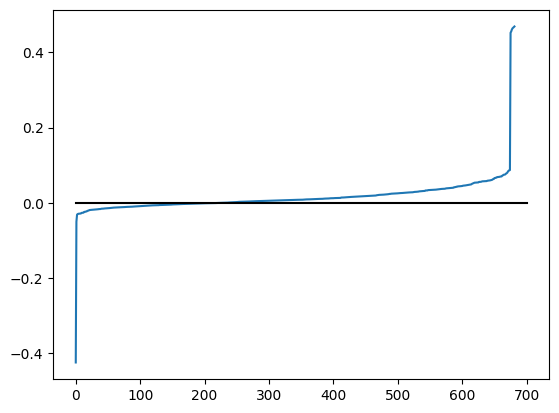

In [16]:
plt.plot(np.sort(percarr_60_sr_cubic-percarr_60_cubic))
plt.plot([0,700],[0,0],color="black")
plt.show()

In [17]:
print(np.mean(percarr_40_cubic))
print(np.mean(percarr_60_cubic))
print(np.mean(percarr_40_sr_cubic))
print(np.mean(percarr_60_sr_cubic))

0.9095666142967466
0.9290477721279974
0.9377283160923789
0.9456388298998523


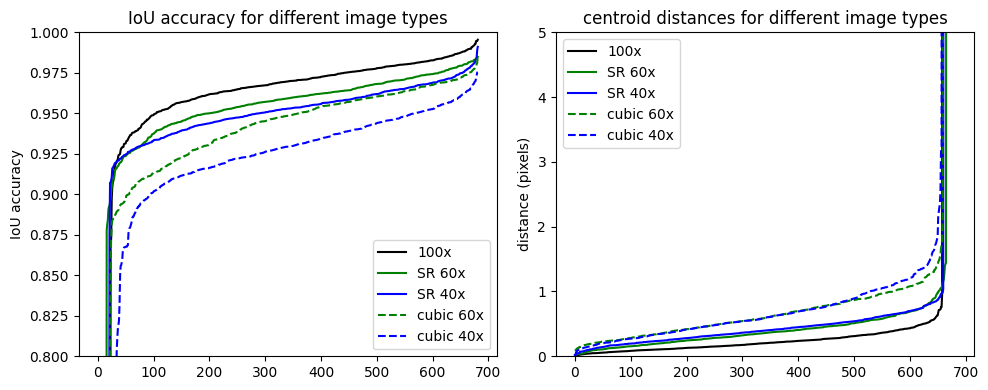

In [21]:
fig, axs = plt.subplots(1,2,figsize=(10,4))
axs[0].plot(np.sort(percarr_100_cubic),"-",label="100x",color="black")
axs[0].plot(np.sort(percarr_60_sr_cubic),"-",label="SR 60x",color="green")
axs[0].plot(np.sort(percarr_40_sr_cubic),"-",label="SR 40x",color="blue")
axs[0].plot(np.sort(percarr_60_cubic),"--",label="cubic 60x",color="green")
axs[0].plot(np.sort(percarr_40_cubic),"--",label="cubic 40x",color="blue")
axs[0].set_title("IoU accuracy for different image types")
axs[0].set_ylabel("IoU accuracy")
axs[0].set_ylim(0.8,1)
axs[0].legend()
axs[1].plot(np.sort(dists_100_cubic),"-",label="100x",color="black")
axs[1].plot(np.sort(dists_60_sr_cubic),"-",label="SR 60x",color="green")
axs[1].plot(np.sort(dists_40_sr_cubic),"-",label="SR 40x",color="blue")
axs[1].plot(np.sort(dists_60_cubic),"--",label="cubic 60x",color="green")
axs[1].plot(np.sort(dists_40_cubic),"--",label="cubic 40x",color="blue")
axs[1].set_title("centroid distances for different image types")
axs[1].set_ylabel("distance (pixels)")
axs[1].set_ylim(0,5)
axs[1].legend()
fig.tight_layout()
plt.show()

In [22]:
output_60_sr_cubic_list = []
for i in range(len(os.listdir(SR_TRAIN_DIR_TILED_60+"models"))):
    temp_output_60_sr_cubic = do_everything_after(SR_TRAIN_DIR_TILED_60,SR_TEST_DIR_TILED_60,SR_SEG_TEST_DIR_60,model_number=i)
    output_60_sr_cubic_list.append(temp_output_60_sr_cubic)

folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1092_cubic_SR_tiled_segmentations/
Using model: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1092_cubic_SR_tiled/models\cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.1092_cubic_SR_tiled_10.pth
2023-03-14 14:19:23,632 [INFO] ** TORCH GPU version installed and working. **
2023-03-14 14:19:23,633 [INFO] >>>> using GPU
2023-03-14 14:19:27,952 [INFO] 100%|##########| 5/5 [00:04<00:00,  1.24it/s]
folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1092_cubic_SR_tiled_segmentations/
Using model: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1092_cubic_SR_tiled/models\cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.10

In [23]:
output_40_sr_cubic_list = []
for i in range(len(os.listdir(SR_TRAIN_DIR_TILED_40+"models"))):
    temp_output_40_sr_cubic = do_everything_after(SR_TRAIN_DIR_TILED_40,SR_TEST_DIR_TILED_40,SR_SEG_TEST_DIR_40,model_number=i)
    output_40_sr_cubic_list.append(temp_output_40_sr_cubic)

folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1638_cubic_SR_tiled_segmentations/
Using model: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1638_cubic_SR_tiled/models\cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.1638_cubic_SR_tiled_10.pth
2023-03-14 14:21:09,643 [INFO] ** TORCH GPU version installed and working. **
2023-03-14 14:21:09,644 [INFO] >>>> using GPU
2023-03-14 14:21:13,597 [INFO] 100%|##########| 5/5 [00:03<00:00,  1.32it/s]
folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1638_cubic_SR_tiled_segmentations/
Using model: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1638_cubic_SR_tiled/models\cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.16

In [24]:
num=10
colors = np.vstack((np.linspace(0,0.9,num),np.linspace(0,0.9,num),np.linspace(0,0.9,num))).T
colors.shape

(10, 3)

In [60]:
output_40_sr_cubic_list[0][4]

[]

In [28]:
for i,val in enumerate(output_60_cubic_list):
    print(i+10, np.mean(val[0]))

10 0.8970216310784919
11 0.9204630362875027
12 0.9199667635487667
13 0.9280205128922645
14 0.9236896323939287
15 0.9405466042681971
16 0.8823358461258968
17 0.9290477721279974
18 0.9340709080599324
19 0.907666891210867


In [31]:
for i,val in enumerate(output_40_sr_cubic_list):
    print(i, np.mean(val[0]))

0 0.8896671855445804
1 0.8696061817612679
2 0.9125646266729703
3 0.890068117620331
4 0.9162681764380476
5 0.8933580731375506
6 0.9234748049425348
7 0.8981862755088023
8 0.9161655488625123
9 0.9102692445331251
10 0.929423981265356
11 0.9299507408938114
12 0.9309653729718321
13 0.9350366594359963
14 0.9365785112410978
15 0.9377283160923789
16 0.913882077599779
17 0.9249892475463636
18 0.9119845551013641
19 0.9099948759991521


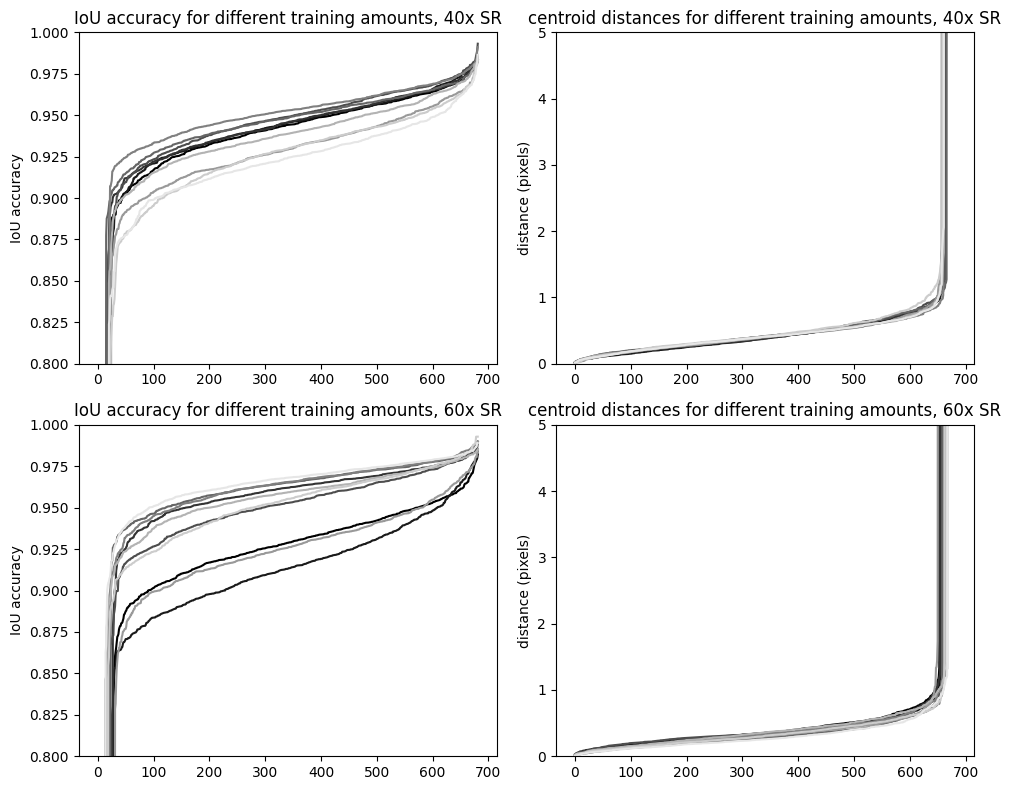

In [30]:
fig, axs = plt.subplots(2,2,figsize=(10,8))
for i in range(10,20):
    axs[0][0].plot(np.sort(output_40_sr_cubic_list[i][0]),color=colors[i-num])
    axs[0][1].plot(np.sort(output_40_sr_cubic_list[i][2]),color=colors[i-num])
    axs[1][0].plot(np.sort(output_60_sr_cubic_list[i][0]),color=colors[i-num])
    axs[1][1].plot(np.sort(output_60_sr_cubic_list[i][2]),color=colors[i-num])


axs[0][0].set_title("IoU accuracy for different training amounts, 40x SR")
axs[0][0].set_ylabel("IoU accuracy")
axs[0][1].set_title("centroid distances for different training amounts, 40x SR")
axs[0][1].set_ylabel("distance (pixels)")
axs[1][0].set_title("IoU accuracy for different training amounts, 60x SR")
axs[1][0].set_ylabel("IoU accuracy")
axs[1][1].set_title("centroid distances for different training amounts, 60x SR")
axs[1][1].set_ylabel("distance (pixels)")
axs[0][0].set_ylim(0.8,1)
axs[0][1].set_ylim(0,5)
axs[1][0].set_ylim(0.8,1)
axs[1][1].set_ylim(0,5)
fig.tight_layout()
plt.show()

In [25]:
output_60_cubic_list = []
for i in range(10,len(os.listdir(TRAIN_DIR_TILED_60+"models"))):
    temp_output_60_cubic = do_everything_after(TRAIN_DIR_TILED_60,TEST_DIR_TILED_60,SEG_TEST_DIR_60,model_number=i)
    output_60_cubic_list.append(temp_output_60_cubic)

folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1092_cubic_tiled_segmentations/
Using model: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1092_cubic_tiled/models\cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.1092_cubic_tiled_110.pth
2023-03-14 14:22:58,390 [INFO] ** TORCH GPU version installed and working. **
2023-03-14 14:22:58,391 [INFO] >>>> using GPU
2023-03-14 14:23:02,391 [INFO] 100%|##########| 5/5 [00:03<00:00,  1.31it/s]
folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1092_cubic_tiled_segmentations/
Using model: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1092_cubic_tiled/models\cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.1092_cubic_tiled

In [26]:
output_40_cubic_list = []
for i in range(10,len(os.listdir(TRAIN_DIR_TILED_40+"models"))):
    temp_output_40_cubic = do_everything_after(TRAIN_DIR_TILED_40,TEST_DIR_TILED_40,SEG_TEST_DIR_40,model_number=i)
    output_40_cubic_list.append(temp_output_40_cubic)

folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1638_cubic_tiled_segmentations/
Using model: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1638_cubic_tiled/models\cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.1638_cubic_tiled_110.pth
2023-03-14 14:23:52,455 [INFO] ** TORCH GPU version installed and working. **
2023-03-14 14:23:52,456 [INFO] >>>> using GPU
2023-03-14 14:23:56,538 [INFO] 100%|##########| 5/5 [00:03<00:00,  1.28it/s]
folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1638_cubic_tiled_segmentations/
Using model: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.1638_cubic_tiled/models\cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.1638_cubic_tiled

In [27]:
output_100_cubic_list = []
for i in range(10,len(os.listdir(TRAIN_DIR_TILED_100+"models"))):
    temp_output_100_cubic = do_everything_after(TRAIN_DIR_TILED_100,TEST_DIR_TILED_100,SEG_TEST_DIR_100,model_number=i)
    output_100_cubic_list.append(temp_output_100_cubic)

folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.0655_cubic_tiled_segmentations/
Using model: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.0655_tiled/models\cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.0655_tiled_110.pth
2023-03-14 14:24:47,613 [INFO] ** TORCH GPU version installed and working. **
2023-03-14 14:24:47,614 [INFO] >>>> using GPU
2023-03-14 14:24:51,863 [INFO] 100%|##########| 5/5 [00:04<00:00,  1.23it/s]
folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.0655_cubic_tiled_segmentations/
Using model: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/train/pmc_0.0655_tiled/models\cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.0655_tiled_120.pth
2023-03-14 14:2

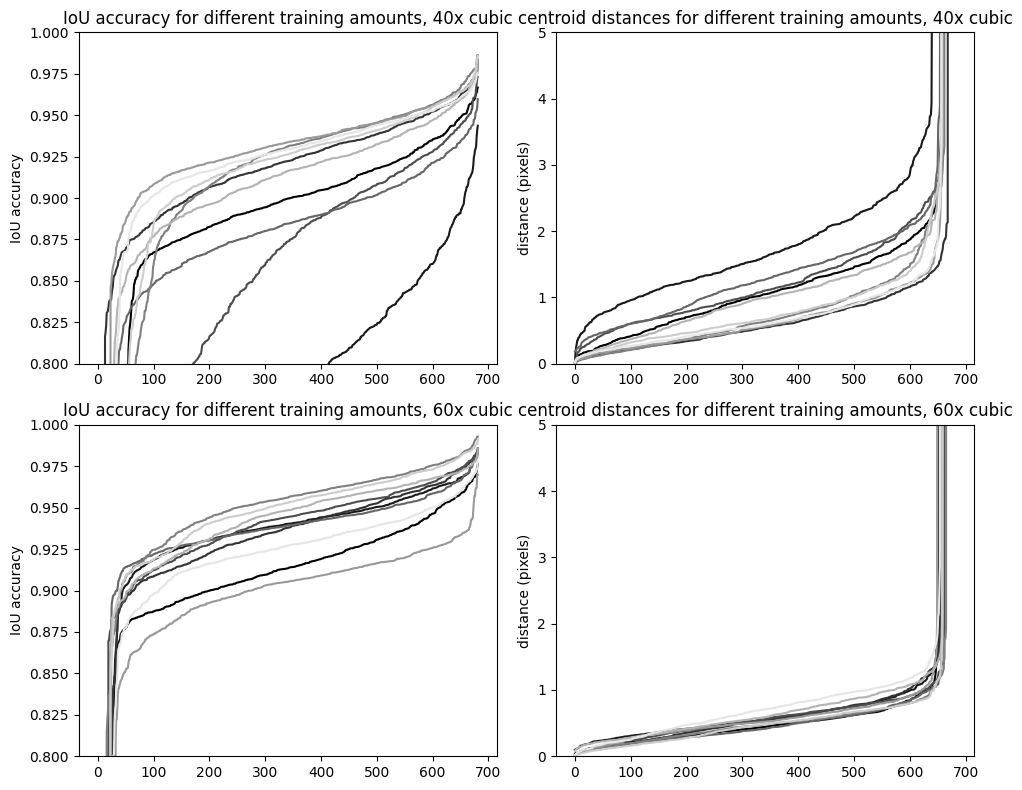

In [71]:
fig, axs = plt.subplots(2,2,figsize=(10,8))
for i in range(10):
    axs[0][0].plot(np.sort(output_40_cubic_list[i][0]),color=colors[i])
    axs[0][1].plot(np.sort(output_40_cubic_list[i][2]),color=colors[i])
    axs[1][0].plot(np.sort(output_60_cubic_list[i][0]),color=colors[i])
    axs[1][1].plot(np.sort(output_60_cubic_list[i][2]),color=colors[i])


axs[0][0].set_title("IoU accuracy for different training amounts, 40x cubic")
axs[0][0].set_ylabel("IoU accuracy")
axs[0][1].set_title("centroid distances for different training amounts, 40x cubic")
axs[0][1].set_ylabel("distance (pixels)")
axs[1][0].set_title("IoU accuracy for different training amounts, 60x cubic")
axs[1][0].set_ylabel("IoU accuracy")
axs[1][1].set_title("centroid distances for different training amounts, 60x cubic")
axs[1][1].set_ylabel("distance (pixels)")
axs[0][0].set_ylim(0.8,1)
axs[0][1].set_ylim(0,5)
axs[1][0].set_ylim(0.8,1)
axs[1][1].set_ylim(0,5)
fig.tight_layout()
plt.show()

In [35]:
sr_image = np.array(Image.open("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1092_cubic_SR/synth_00014_pmc_0.1092.png"))
lr_image = np.array(Image.open("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1092_cubic/synth_00014_pmc_0.1092.png"))
hr_image = tifffile.imread("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.0655/convolutions/synth_00014_pmc_0.0655.tif")//256

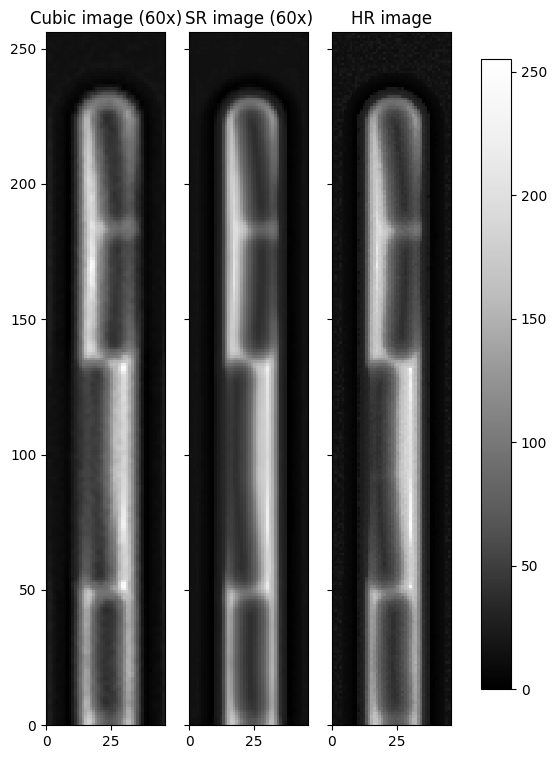

In [44]:
fig,axs = plt.subplots(1,3,figsize=(6,9),sharey="row")
im = axs[0].pcolor(lr_image[::-1],cmap="Greys_r",vmin=0,vmax=255)
im = axs[1].pcolor(sr_image[::-1],cmap="Greys_r",vmin=0,vmax=255)
im = axs[2].pcolor(hr_image[::-1],cmap="Greys_r",vmin=0,vmax=255)
axs[0].set_title("Cubic image (60x)")
axs[1].set_title("SR image (60x)")
axs[2].set_title("HR image")

fig.subplots_adjust(right=0.8,hspace=0.4)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()

In [46]:
sr_image2 = np.array(Image.open("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1638_cubic_SR/synth_00014_pmc_0.1638.png"))
lr_image2 = np.array(Image.open("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1638_cubic/synth_00014_pmc_0.1638.png"))
hr_image2 = tifffile.imread("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.0655/convolutions/synth_00014_pmc_0.0655.tif")//256

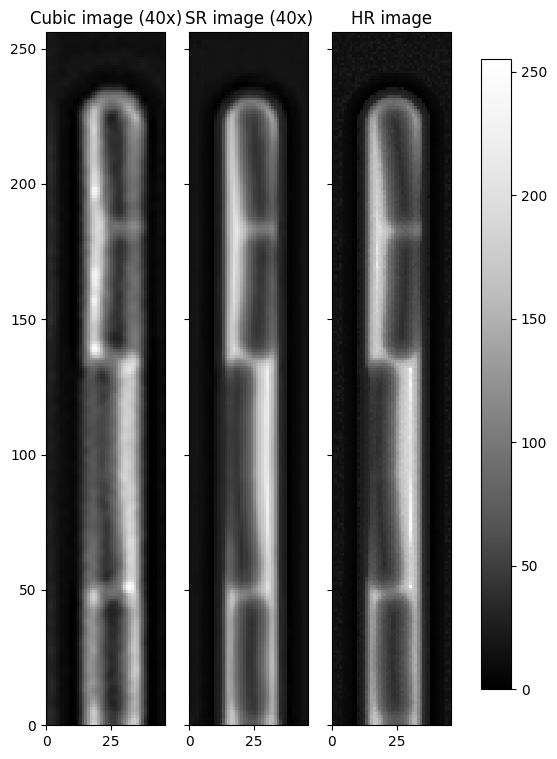

In [47]:
fig,axs = plt.subplots(1,3,figsize=(6,9),sharey="row")
im = axs[0].pcolor(lr_image2[::-1],cmap="Greys_r",vmin=0,vmax=255)
im = axs[1].pcolor(sr_image2[::-1],cmap="Greys_r",vmin=0,vmax=255)
im = axs[2].pcolor(hr_image2[::-1],cmap="Greys_r",vmin=0,vmax=255)
axs[0].set_title("Cubic image (40x)")
axs[1].set_title("SR image (40x)")
axs[2].set_title("HR image")

fig.subplots_adjust(right=0.8,hspace=0.4)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()

In [54]:
images_100x_dir = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.0655/convolutions/"
images_60x_dir = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1092_cubic/"
images_40x_dir = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1638_cubic/"
images_60x_sr_dir = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1092_cubic_SR/"
images_40x_sr_dir = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.1638_cubic_SR/"

In [59]:
hr_images = np.zeros((200,256,46))
linear_images_40 = np.zeros((200,256,46))
sr_images_40 = np.zeros((200,256,46))
linear_images_60 = np.zeros((200,256,46))
sr_images_60 = np.zeros((200,256,46))
for i, files in enumerate(zip(os.listdir(images_100x_dir),os.listdir(images_60x_dir),os.listdir(images_40x_dir),os.listdir(images_60x_sr_dir),os.listdir(images_40x_sr_dir))):
    hr_image = tifffile.imread(images_100x_dir+files[0])//256
    lr_image_linear_60 = np.array(Image.open(images_60x_dir+files[1]))
    lr_image_linear_40 = np.array(Image.open(images_40x_dir+files[2]))
    lr_image_sr_60 = np.array(Image.open(images_60x_sr_dir+files[3]))
    lr_image_sr_40 = np.array(Image.open(images_40x_sr_dir+files[4]))
    hr_images[i] = hr_image
    linear_images_40[i] = lr_image_linear_40
    sr_images_40[i] = lr_image_sr_40
    linear_images_60[i] = lr_image_linear_60
    sr_images_60[i] = lr_image_sr_60

In [60]:
cubic_loss_60 = (np.sum(np.sum((linear_images_60-hr_images)**2,axis=-1),axis=-1))
sr_loss_60 = (np.sum(np.sum((sr_images_60-hr_images)**2,axis=-1),axis=-1))
cubic_loss_40 = (np.sum(np.sum((linear_images_40-hr_images)**2,axis=-1),axis=-1))
sr_loss_40 = (np.sum(np.sum((sr_images_40-hr_images)**2,axis=-1),axis=-1))

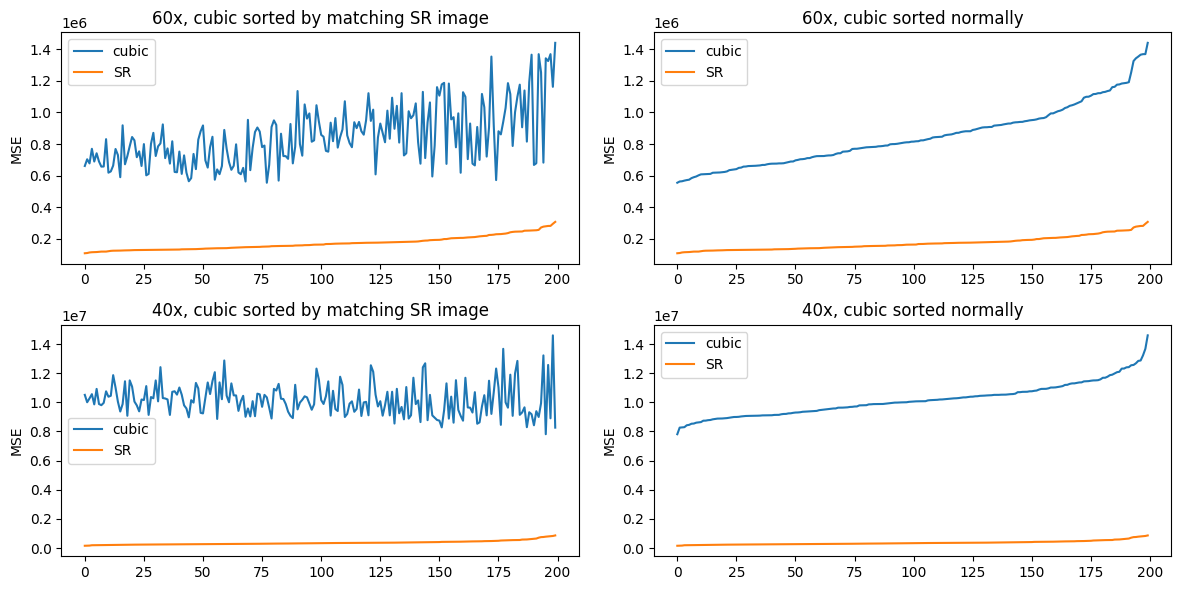

In [65]:
fig, axs = plt.subplots(2,2,figsize=(12,6))
axs[0][0].plot(cubic_loss_60[np.argsort(sr_loss_60)], label = "cubic")
axs[0][0].plot(np.sort(sr_loss_60), label = "SR")
axs[0][0].set_ylabel("MSE")
axs[0][0].set_title("60x, cubic sorted by matching SR image")
axs[0][0].legend()
axs[0][1].plot(np.sort(cubic_loss_60), label = "cubic")
axs[0][1].plot(np.sort(sr_loss_60), label = "SR")
axs[0][1].set_ylabel("MSE")
axs[0][1].set_title("60x, cubic sorted normally")
axs[0][1].legend()
axs[1][0].plot(cubic_loss_40[np.argsort(sr_loss_40)], label = "cubic")
axs[1][0].plot(np.sort(sr_loss_40), label = "SR")
axs[1][0].set_ylabel("MSE")
axs[1][0].set_title("40x, cubic sorted by matching SR image")
axs[1][0].legend()
axs[1][1].plot(np.sort(cubic_loss_40), label = "cubic")
axs[1][1].plot(np.sort(sr_loss_40), label = "SR")
axs[1][1].set_ylabel("MSE")
axs[1][1].set_title("40x, cubic sorted normally")
axs[1][1].legend()
fig.tight_layout()
plt.show()

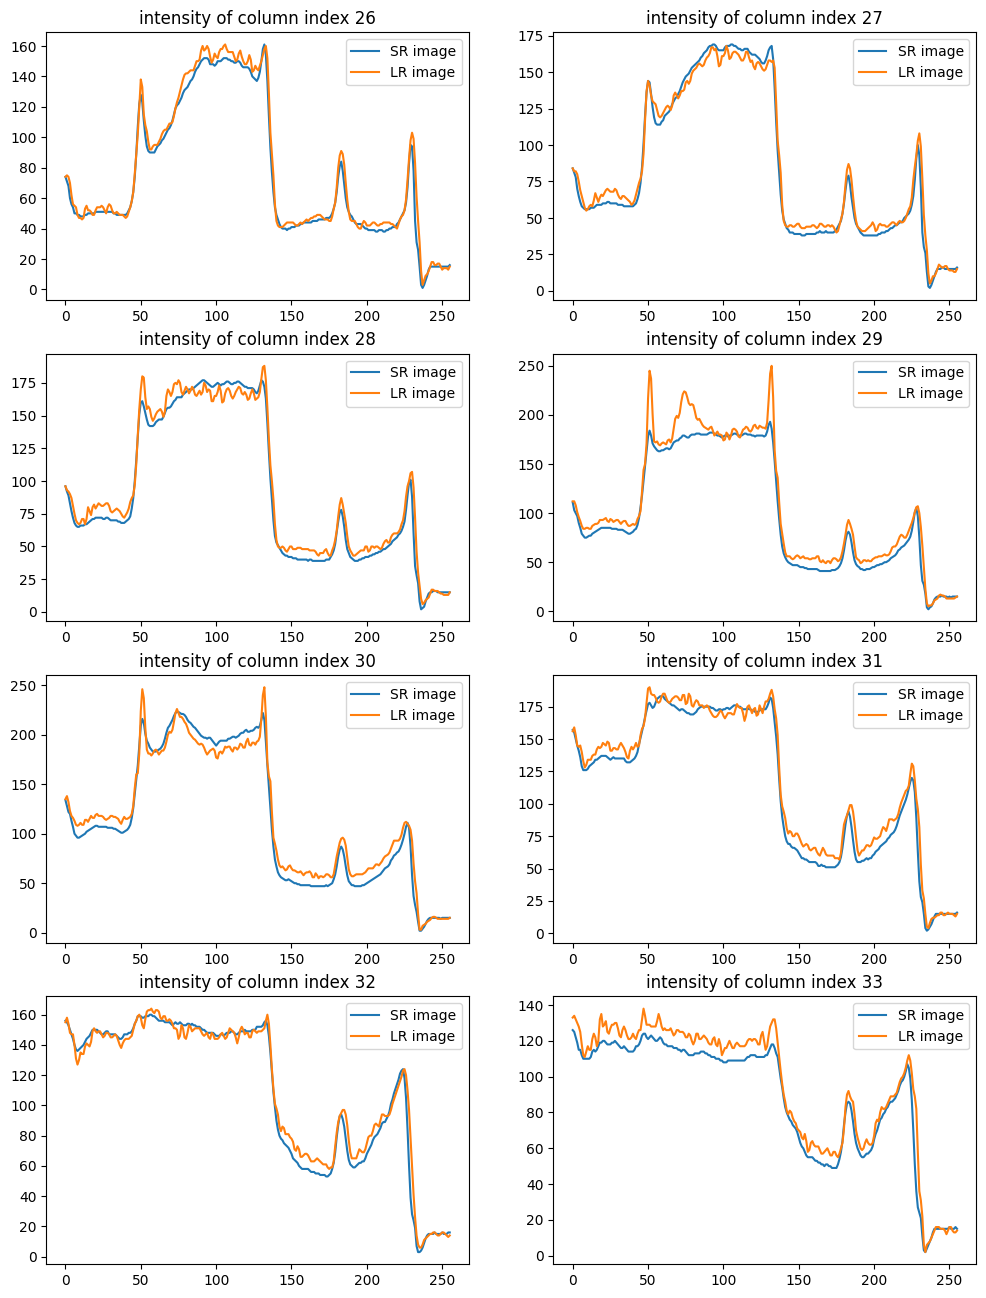

In [122]:
fig,axs = plt.subplots(4,2,figsize=(12,16))
j = 26
for i in range(4):
    axs[i][0].plot(sr_image[::-1][:,j],label="SR image")
    axs[i][0].plot(lr_image[::-1][:,j],label="LR image")
    axs[i][0].set_title(f"intensity of column index {j}")
    axs[i][0].legend()
    axs[i][1].plot(sr_image[::-1][:,j+1],label="SR image")
    axs[i][1].plot(lr_image[::-1][:,j+1],label="LR image")
    axs[i][1].set_title(f"intensity of column index {j+1}")
    axs[i][1].legend()
    j+=2
plt.show()

In [84]:
fft.fftshift(fft.fft(sr_image[::-1][:,20]))[127], fft.fftshift(fft.fft(sr_image[::-1][:,20]))[129]

((-6082.231020645529-1909.5086398030855j),
 (-6082.231020645529+1909.5086398030855j))

In [86]:
np.real(fft.fftshift(fft.fft(sr_image[::-1][:,20]))[127]), np.imag(fft.fftshift(fft.fft(sr_image[::-1][:,20]))[127])

(-6082.231020645529, -1909.5086398030855)

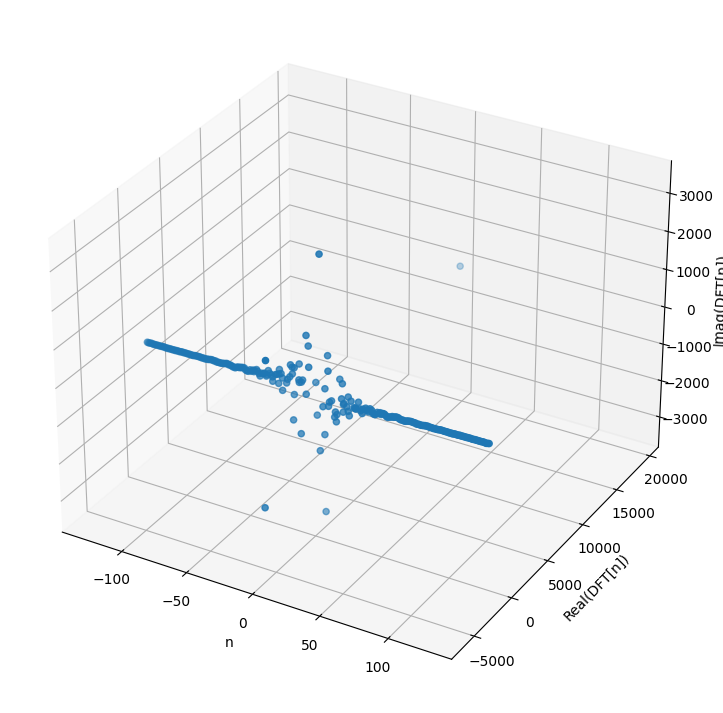

In [89]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(projection='3d')
ax.scatter(np.arange(-128,128),np.real(fft.fftshift(fft.fft(sr_image[::-1][:,20]))),np.imag(fft.fftshift(fft.fft(sr_image[::-1][:,20]))))
ax.set_xlabel('n')
ax.set_ylabel('Real(DFT[n])')
ax.set_zlabel('Imag(DFT[n])')
plt.show()

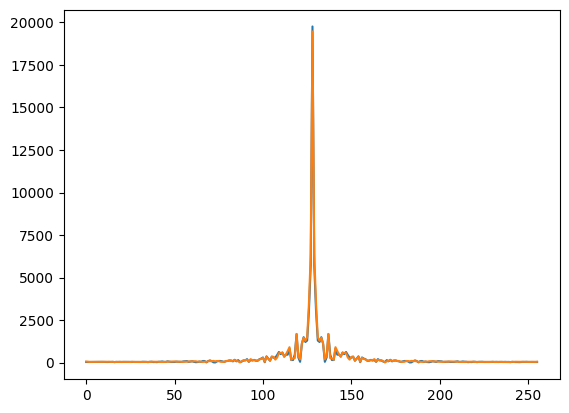

In [83]:
plt.plot(np.absolute(fft.fftshift(fft.fft(lr_image[::-1][:,20]))))
plt.plot(np.absolute(fft.fftshift(fft.fft(sr_image[::-1][:,20]))))
plt.show()

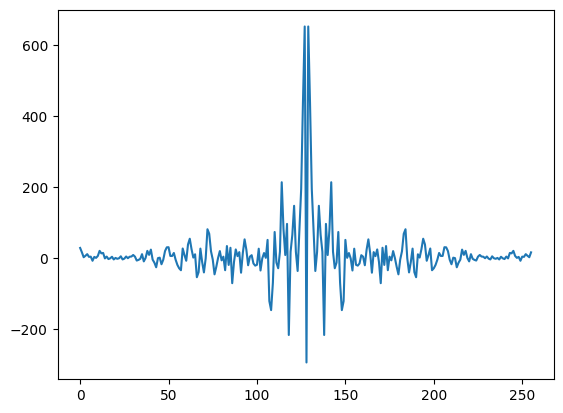

In [79]:
plt.plot(np.absolute(fft.fftshift(fft.fft(sr_image[::-1][:,20])))-np.absolute(fft.fftshift(fft.fft(lr_image[::-1][:,20]))))
plt.show()

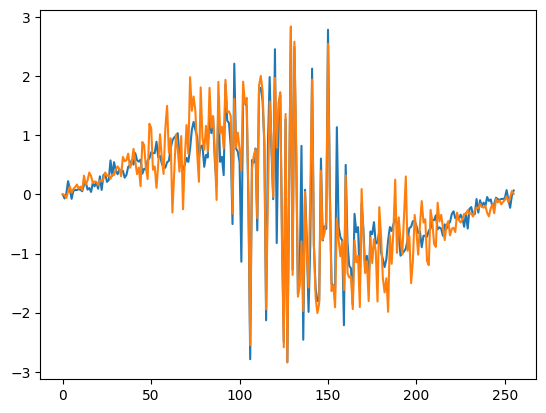

In [78]:
plt.plot(np.angle(fft.fftshift(fft.fft(sr_image[::-1][:,20]))))
plt.plot(np.angle(fft.fftshift(fft.fft(lr_image[::-1][:,20]))))
plt.show()

In [64]:
some = np.array([[1,2,3,3,2,1],[1,2,3,3,2,1],[1,2,3,3,2,1],[1,2,3,3,2,1],[1,2,3,3,2,1]])
other = linear_interpolate(some,target_shape=[5,3])
other

array([[1., 3., 1.],
       [1., 3., 1.],
       [1., 3., 1.],
       [1., 3., 1.],
       [1., 3., 1.]])